# 4. Visualisation using matpotlib

In [1]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt
data = pandas.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


## Downsampling and plotting 

### Average rating/count by day

In [2]:
data['Day'] = data['Timestamp'].dt.date
data.head()
#created a new column 'Day'

,Course Name,Timestamp,Rating,Comment,Day
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02


In [3]:
day_average = data.groupby(["Day"]).mean()
day_average.head()
#don't forget the method you want to group by

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


In [4]:
day_count = data.groupby(["Day"]).count()
#see the difference no. of columns with day_average
day_count.head()

,Course Name,Timestamp,Rating,Comment
Day,,,,
2018-01-01,46,46,46,7
2018-01-02,57,57,57,16
2018-01-03,43,43,43,8
2018-01-04,48,48,48,11
2018-01-05,52,52,52,15


In [5]:
type(day_average)
#is a database, 'Day' is an index not a column

pandas.core.frame.DataFrame

In [6]:
type(day_average.index)

pandas.core.indexes.base.Index

In [7]:
day_average.index

Index([2018-01-01, 2018-01-02, 2018-01-03, 2018-01-04, 2018-01-05, 2018-01-06,
       2018-01-07, 2018-01-08, 2018-01-09, 2018-01-10,
       ...
       2021-03-24, 2021-03-25, 2021-03-26, 2021-03-27, 2021-03-28, 2021-03-29,
       2021-03-30, 2021-03-31, 2021-04-01, 2021-04-02],
      dtype='object', name='Day', length=1188)

In [8]:
type(day_average['Rating'])

pandas.core.series.Series

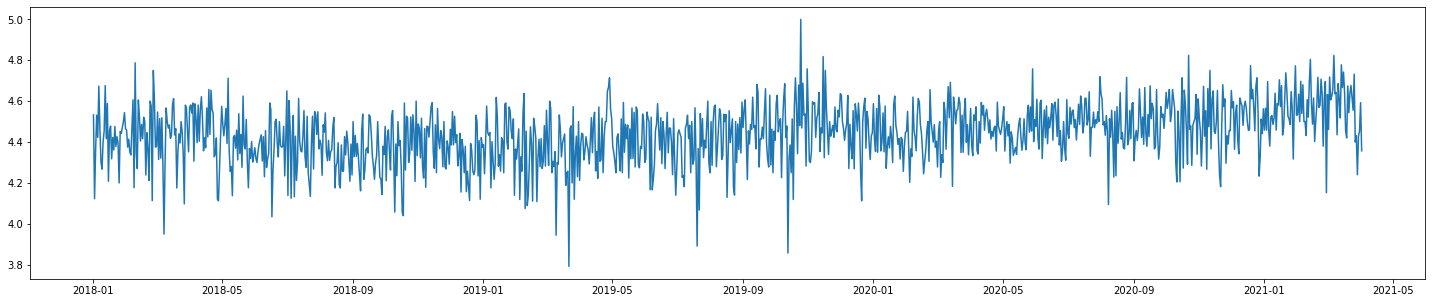

In [9]:
#plt.plot(x-axis, y-axis)
plt.figure(figsize=(25,5))
plt.plot(day_average.index, day_average['Rating'])

### Average rating by week

In [10]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
data['Week'].head()

0    2021-13
1    2021-13
2    2021-13
3    2021-13
4    2021-13
Name: Week, dtype: object

In [11]:
week_average = data.groupby(["Week"]).mean()
week_average.head()

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085


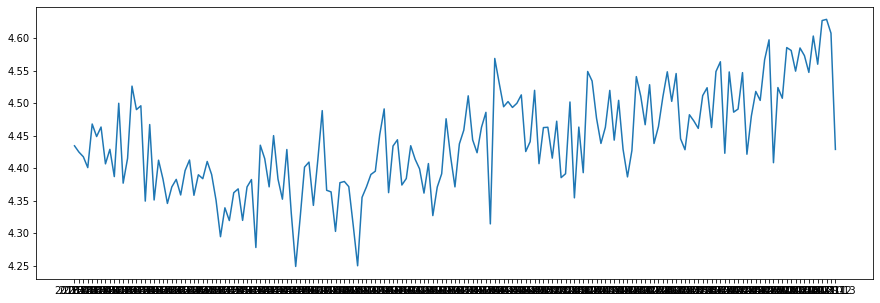

In [12]:
plt.figure(figsize=(15,5))
plt.plot(week_average.index, week_average['Rating'])

### Average rating by month

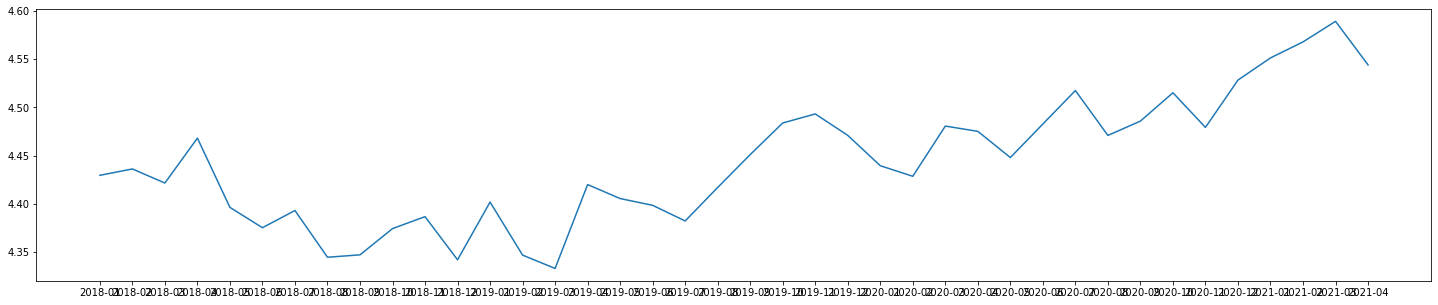

In [13]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(["Month"]).mean()
plt.figure(figsize=(25,5))
plt.plot(month_average.index, month_average['Rating'])

### Averange rating by month by course

In [14]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean()
month_average_crs.head()
#it has 2 index

Rating
Month   Course Name                                                 
2018-01 100 Python Exercises I: Evaluate and Improve Yo...  4.353448
        Data Processing with Python                         4.500000
        Interactive Data Visualization with Python and ...  4.285714
        Learn GIS in One Hour                               4.236842
        Python for Beginners with Examples                  4.355422

In [15]:
month_average_crs = data.groupby(['Month', 'Course Name']).mean().unstack()
month_average_crs.head()

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          

                                         \
Course Name Data Processing with Python   
Month                                     
2018-01                        4.500000   
2018-02                        4.205882   
2018-03                        4.281250   
2018-04                        4.468750   
2018-05                        4.176471   

                                                                  \
Course Name Interactive Data Visualization with Python and Bokeh   
Month                                                              
2018-01                                               4.285714     
2018-02                                               4.157895     
2018-03                                               4.266667     
2018-04                                               4.428571     
2018-05                                               4.107143     

                                                                      \
Course Name Learn GIS in One Hour Python for Beginners with Examples   
Month                                                                  
2018-01                  4.236842                           4.355422   
2018-02                  4.437500                           4.363095   
2018-03                  4.166667                           4.357143   
2018-04                  4.250000                           4.378947   
2018-05                  4.666667                           4.362654   

                                                                        \
Course Name The Complete Python Course: Build 10 Professional OOP Apps   
Month                                                                    
2018-01                                                    NaN           
2018-02                                                    NaN           
2018-03                                                    NaN           
2018-04                                                    NaN           
2018-05                                                    NaN           

                                                                      
Course Name The Python Mega Course: Build 10 Real World Applications  
Month                                                                 
2018-01                                               4.457368        
2018-02                                               4.481070        
2018-03                                               4.447037        
2018-04                                               4.507412        
2018-05                                               4.422085

<AxesSubplot:xlabel='Month'>

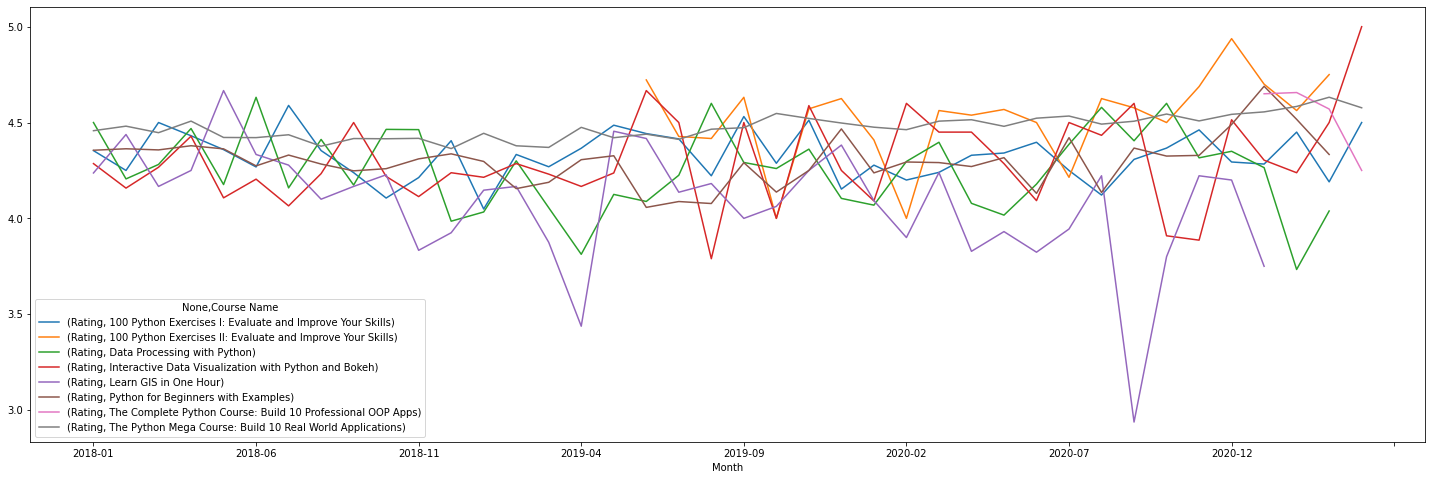

In [16]:
month_average_crs.plot(figsize=(25, 8))
#figsize in plot because plot is not in plt.

### Averange count by month by course

In [17]:
#month_average_crs = data.groupby(['Month', 'Course Name'])
type(month_average_crs)
#so can extract only rating

pandas.core.frame.DataFrame

<AxesSubplot:xlabel='Month'>

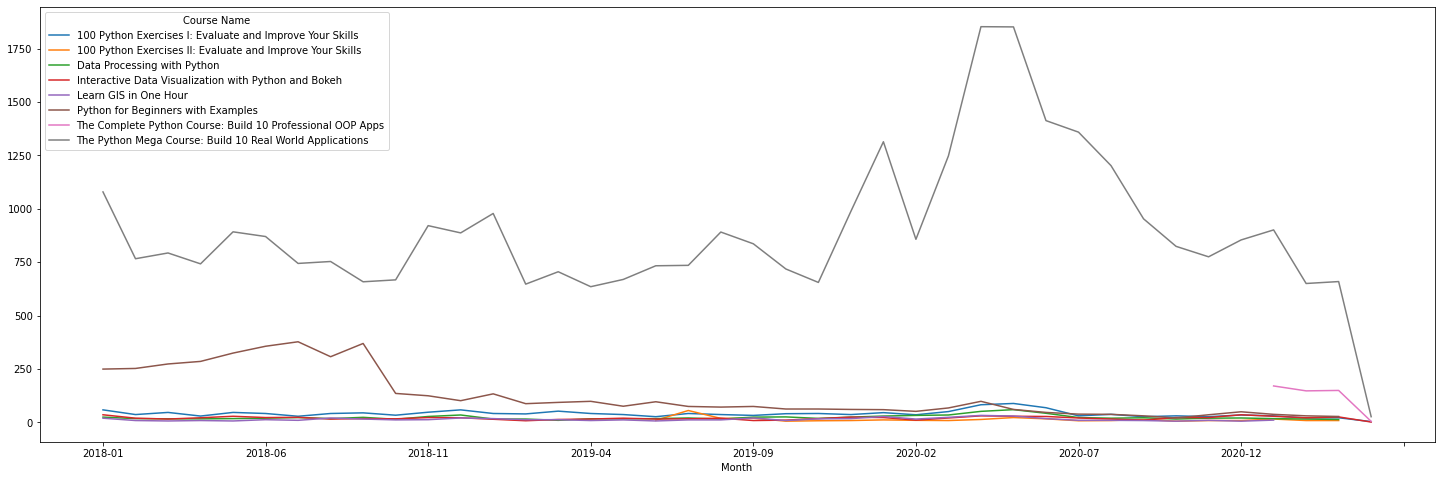

In [18]:
month_count_crs = data.groupby(['Month', 'Course Name'])['Rating'].count().unstack()
month_count_crs.plot(figsize=(25, 8))

## What day of the week are people the happiest

In [19]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data.head()

,Course Name,Timestamp,Rating,Comment,Day,Week,Month,Weekday
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04,Friday
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04,Friday


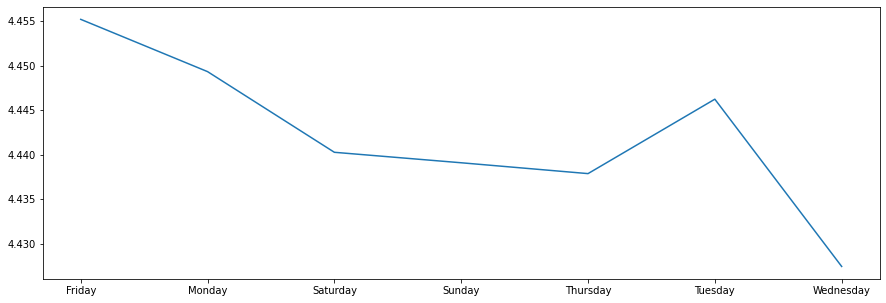

In [20]:
weekday_average = data.groupby(['Weekday']).mean()
plt.figure(figsize=(15,5))
plt.plot(weekday_average.index, weekday_average['Rating'])

In [21]:
#to sort in order
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')
data.head()

,Course Name,Timestamp,Rating,Comment,Day,Week,Month,Weekday,Daynumber
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04,Friday,5


In [22]:
weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
#this returns a multi index, we only want the Weekday
weekday_average.index.get_level_values(0)

Index(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object', name='Weekday')

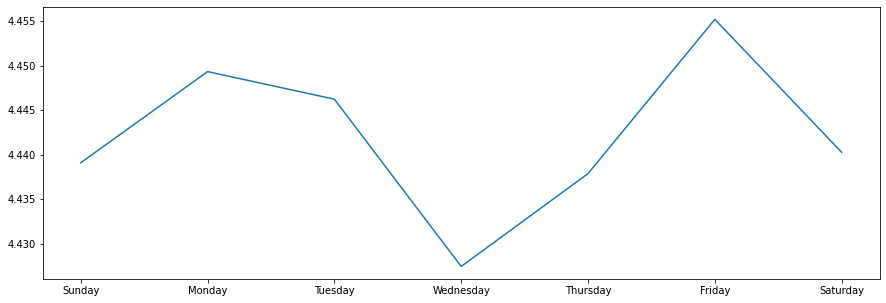

In [23]:
weekday_average = weekday_average.sort_values('Daynumber')
plt.figure(figsize=(15,5))
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])